In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis 

# Load Data
Load flight information. We are interested in the fat-tailed nature of delays.

In [32]:
file_path = '../data/flights/heathrow_flight_delays.csv'
df = pd.read_csv(file_path, index_col=0, parse_dates=[5,6])

In [33]:
df.head()

,flight_id,origin,destination,status,scheduled_datetime,actual_datetime,delay_mins,code_share
0,AC6186,LHR,VIE,Departed,2020-01-29 06:00:00,2020-01-29 06:20:00,20.0,alt_code
1,LX345,LHR,ZRH,Departed,2020-01-29 06:00:00,2020-01-29 06:13:00,13.0,no_codeshare
2,NH5606,LHR,VIE,Departed,2020-01-29 06:00:00,2020-01-29 06:20:00,20.0,alt_code
3,OS458,LHR,VIE,Departed,2020-01-29 06:00:00,2020-01-29 06:20:00,20.0,main_code
4,S48050,LHR,LIS,Departed,2020-01-29 06:00:00,2020-01-29 06:43:00,43.0,alt_code


### Format Data

In [34]:
# Remove Cancelled Flights (delay undefined)
df=df.loc[df.status!='Cancelled']
# Remove codeshare flights ('alt_code')
df = df.loc[df.code_share!='alt_code']

In [36]:
# Check NaN values
nan_value_count = df.isna().any(axis=1).sum()
na_df = df.loc[df.isna().any(axis=1)]
#df.price.isna().sum()

print(f"NaN values count: {nan_value_count}")
print(f"NaN values table:")
display(na_df)

NaN values count: 0
NaN values table:


,flight_id,origin,destination,status,scheduled_datetime,actual_datetime,delay_mins,code_share


In [37]:
# Drop NaN values
df = df.dropna()

In [47]:
# Add Delay in Hours
df['delay'] = df.delay_mins/60

# Analyse

In [48]:
df.head()

,flight_id,origin,destination,status,scheduled_datetime,actual_datetime,delay_mins,code_share,delay
1,LX345,LHR,ZRH,Departed,2020-01-29 06:00:00,2020-01-29 06:13:00,13.0,no_codeshare,0.216667
3,OS458,LHR,VIE,Departed,2020-01-29 06:00:00,2020-01-29 06:20:00,20.0,main_code,0.333333
6,TP1363,LHR,LIS,Departed,2020-01-29 06:00:00,2020-01-29 06:43:00,43.0,main_code,0.716667
8,BA472,LHR,BCN,Departed,2020-01-29 06:15:00,2020-01-29 06:40:00,25.0,main_code,0.416667
10,BA1432,LHR,EDI,Departed,2020-01-29 06:20:00,2020-01-29 06:48:00,28.0,main_code,0.466667


### Exceedance Probability Plot
Log(x) vs. Log(Pr(X>x))

In [49]:
from math import log10

First let's sort the prices from low to high.

Then calculate steps towards an exceedance probability.

In [51]:
sorted_df = df.sort_values(by='delay')
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df.rename(columns={'index':'old_index'})

In [52]:
sorted_df['ones'] = 1
sorted_df['cumcount'] = sorted_df.ones.cumsum()
sorted_df['exceedance_count'] = len(sorted_df)-sorted_df.cumcount+1

In [53]:
# Exceedance probability
sorted_df['exceed_prob'] = sorted_df.exceedance_count/len(sorted_df)

In [54]:
#sorted_df['log_price']=sorted_df.price.apply(log10)
#sorted_df['log_exceed_prob']=sorted_df.exceed_prob.apply(log10)

In [55]:
sorted_df.head() # Lowest Prices

,old_index,flight_id,origin,destination,status,scheduled_datetime,actual_datetime,delay_mins,code_share,delay,ones,cumcount,exceedance_count,exceed_prob
0,193,MH003,LHR,KUL,Departed,2020-04-12 22:40:00,2020-04-12 00:45:00,-1315.0,main_code,-21.916667,1,1,35251,1.000000
1,481,BA041,LHR,DUR,Departed,2020-03-26 15:55:00,2020-03-26 08:04:00,-471.0,no_codeshare,-7.850000,1,2,35250,0.999972
2,260,BA1458,LHR,EDI,Departed,2020-04-02 19:00:00,2020-04-02 15:05:00,-235.0,main_code,-3.916667,1,3,35249,0.999943
3,945,BA277,LHR,HYD,Departed,2020-03-18 14:40:00,2020-03-18 11:52:00,-168.0,main_code,-2.800000,1,4,35248,0.999915
4,887,BA035,LHR,MAA,Departed,2020-03-18 14:10:00,2020-03-18 11:46:00,-144.0,main_code,-2.400000,1,5,35247,0.999887


In [56]:
sorted_df.tail() # Highest Prices

,old_index,flight_id,origin,destination,status,scheduled_datetime,actual_datetime,delay_mins,code_share,delay,ones,cumcount,exceedance_count,exceed_prob
35246,490,AA733,LHR,CLT,Departed,2020-02-22 10:05:00,2020-02-23 08:15:00,1330.0,main_code,22.166667,1,35247,5,0.000142
35247,2006,ET701,LHR,ADD,Departed,2020-03-11 20:15:00,2020-03-12 19:28:00,1393.0,main_code,23.216667,1,35248,4,0.000113
35248,800,UA919,LHR,IAD,Departed,2020-02-09 12:05:00,2020-02-10 12:33:00,1468.0,main_code,24.466667,1,35249,3,0.000085
35249,2075,CA938,LHR,PEK,Departed,2020-02-09 20:25:00,2020-02-10 21:02:00,1477.0,main_code,24.616667,1,35250,2,0.000057
35250,579,MH003,LHR,KUL,Departed,2020-02-26 10:25:00,2020-02-27 23:16:00,2211.0,main_code,36.850000,1,35251,1,0.000028


I'm not sure how it handles tiny values and log(0)

In [22]:
#Maybe Remove tiny values because they blow up when taking log
#sorted_df.price+=-1*sorted_df.price.min()

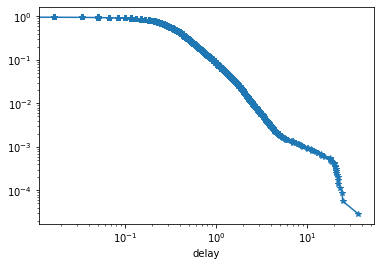

In [58]:
sorted_df.set_index('delay').exceed_prob.plot(loglog=True, marker='*')
#sorted_df.plot.scatter('log_price', 'log_exceed_prob')

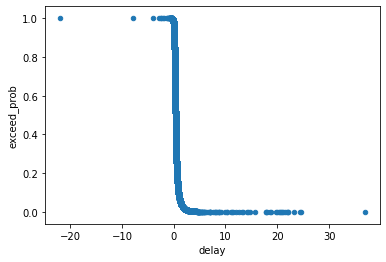

In [60]:
sorted_df.plot.scatter('delay', 'exceed_prob')

Conclusions:
* Looks like a power law between ~6 and 40 minutes of delay
* Let's do another notebook looking at the left tail

# Histogram